In [63]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Test

In [57]:
X = np.random.random((50,2))
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
centers = kmeans.cluster_centers_
print(centers)

[[ 0.25427973  0.46895407]
 [ 0.77978719  0.45356553]]


In [58]:
X = np.hstack((X,kmeans.labels_[:,None]))

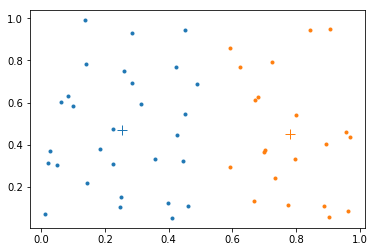

In [59]:
plt.plot(X[X[:,-1]==0][:,0],X[X[:,-1]==0][:,1],'.')
plt.plot(X[X[:,-1]==1][:,0],X[X[:,-1]==1][:,1],'.')
plt.plot(centers[0,0],centers[0,1],'+',color='tab:blue',ms=10)
plt.plot(centers[1,0],centers[1,1],'+',color='tab:orange',ms=10)
plt.show()

## Bisecting KMeans

In [70]:
def calc_distances(data,centroids,dist,n):
    '''n - list length 2, indicies of clusters that need distances calculated?'''
    i = n[0]
    j = n[1]
    new_dist1 = np.sum(la.norm(data[data[:,-1]==i][:,:-1] - centroids[i], axis=1))
    new_dist2 = np.sum(la.norm(data[data[:,-1]==j][:,:-1] - centroids[j], axis=1))
    dist[i] = new_dist1
    dist[j] = new_dist2
    #return nd-array distances
    return dist

In [97]:
def bisecting_kmeans(data, k):
    '''
    returns centers and labels for data'''
    
    # Get initial 2 clusters
    kmeans = KMeans(n_clusters=2).fit(data)
    centers = kmeans.cluster_centers_
    
    # Add cluster number to end of data? (if rows correspond to data points)
    data = np.hstack((data,kmeans.labels_[:,None]))
    n = [0,1]
    distances = np.zeros(k)
    for i in range(k-2):
        # Calculate distances
        distances = calc_distances(data,centers,distances,n)
        
        # choose which cluster to split (the one with largest distances)
        index = np.argmax(distances)
        
        # split the cluster
        kmeans = KMeans(n_clusters=2).fit(data[data[:,-1] == index][:,:-1])
        centers_new = kmeans.cluster_centers_
        
        # Update centers saved
        centers[index] = np.copy(centers_new[0])
        centers = np.vstack((centers,centers_new[1]))
        
        # Mask new labels
        labels = kmeans.labels_
        labels[labels == 0] = index
        labels[labels == 1] = i + 2 # want this to be the # of centers before the split
        
        # Update labels
        data[:,-1][data[:,-1] == index] = kmeans.labels_
        
        n = [index, i+2]
    
    return centers, data[:,-1]

In [188]:
X2 = np.random.random((100,2))
centers, labels = bisecting_kmeans(X2, 3)
X2 = np.hstack((X2,labels[:,None]))

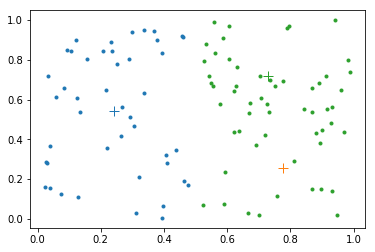

In [189]:
plt.plot(X2[X2[:,-1]==0][:,0],X2[X2[:,-1]==0][:,1],'.')
plt.plot(X2[X2[:,-1]==1][:,0],X2[X2[:,-1]==1][:,1],'.')
plt.plot(X2[X2[:,-1]==2][:,0],X2[X2[:,-1]==2][:,1],'.')
# plt.plot(X2[X2[:,-1]==3][:,0],X2[X2[:,-1]==3][:,1],'.')
plt.plot(centers[0,0],centers[0,1],'+',color='tab:blue',ms=10)
plt.plot(centers[1,0],centers[1,1],'+',color='tab:orange',ms=10)
plt.plot(centers[2,0],centers[2,1],'+',color='tab:green',ms=10)
# plt.plot(centers[3,0],centers[3,1],'+',color='tab:red',ms=10)
plt.show()

In [124]:
print(X2[X2[:,-1]==1][:,1])

[]


In [82]:
print(centers)

[[ 0.25427973  0.46895407]
 [ 0.77978719  0.45356553]]
